In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import torch
%matplotlib inline

pal = sns.color_palette()
train_set_parent_path = os.getcwd()+"/drive/MyDrive/ECS_adml/data_set"
print('# File sizes')
for f in os.listdir(train_set_file_path):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize(train_set_parent_path+ '/' + f) / 1000000, 2)) + 'MB')

# File sizes


NameError: ignored

In [ ]:
# file
train_set_file_path = os.getcwd()


df_train = pd.read_csv(train_set_file_path+"/drive/MyDrive/ECS_adml/data_set/train.csv")

df_test = pd.read_csv(train_set_file_path+"/drive/MyDrive/ECS_adml/data_set/test.csv")

df_train.head()
print(len(df_test))

2345796


# 新段落

In [ ]:
df_train.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


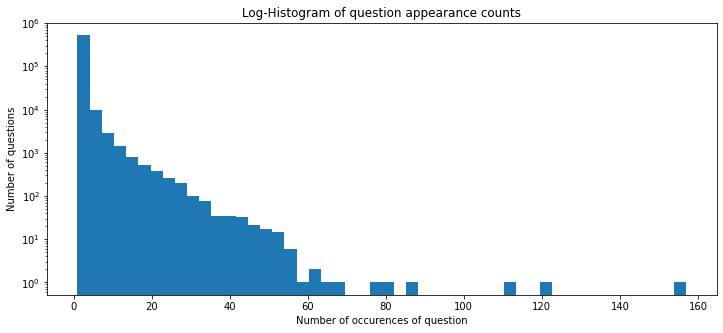

In [ ]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.savefig('Log-Histogram of question appearance counts')

# Test submission

In [ ]:
# Test submission
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
print("p:", p)
print(df_train['is_duplicate'].shape)
print('Predicted score:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))


sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

p: 0.369197853026293
(404290,)
Predicted score: 0.6585273839844354


,test_id,is_duplicate
0,0,0.369198
1,1,0.369198
2,2,0.369198
3,3,0.369198
4,4,0.369198


In [ ]:
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


66
0    66
1    51
2    73
3    50
4    76
dtype: int64
mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


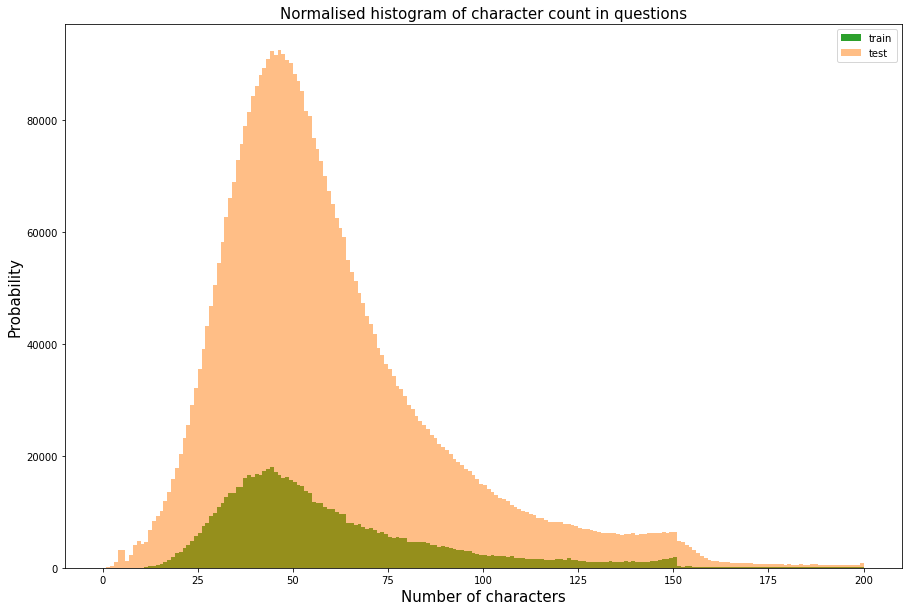

In [ ]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)
print(len(df_train['question1'][0]))
dist_train = train_qs.apply(len)
print(dist_train.head())
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

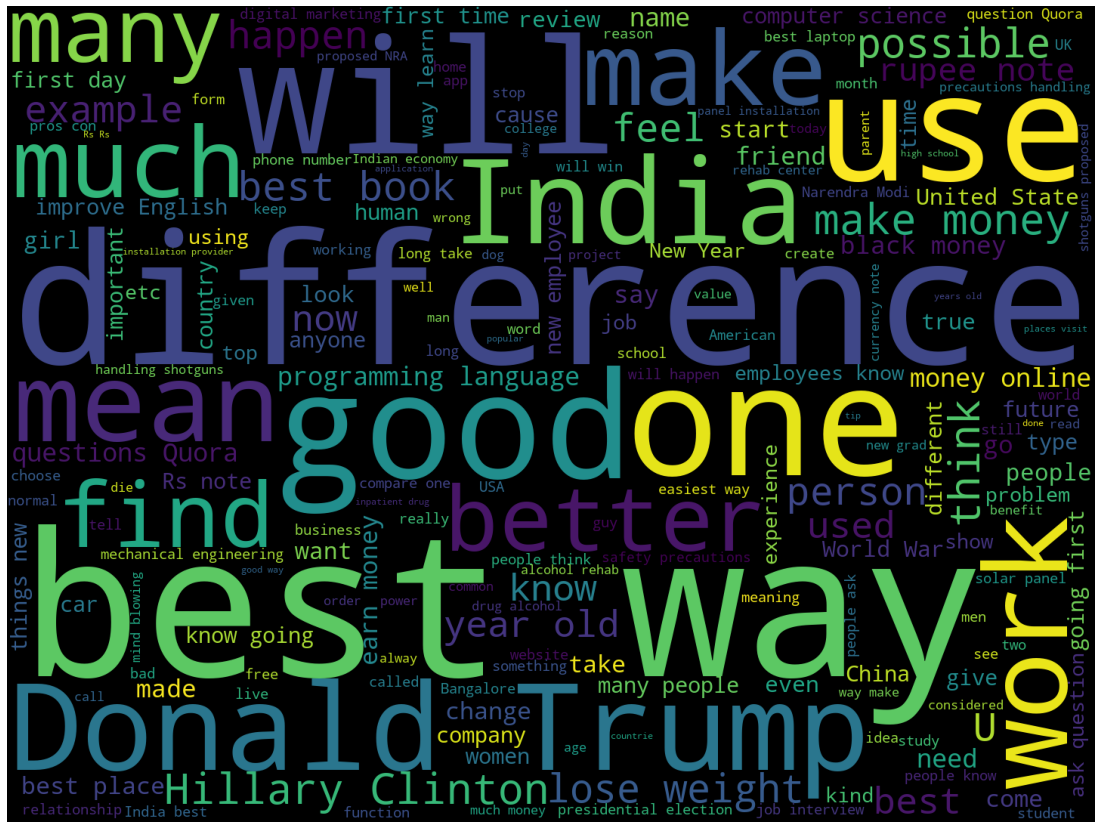

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


# initial feature analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0    0.727273
1    0.307692
2    0.363636
3    0.000000
4    0.000000
dtype: float64


Text(0.5, 0, 'word_match_share')

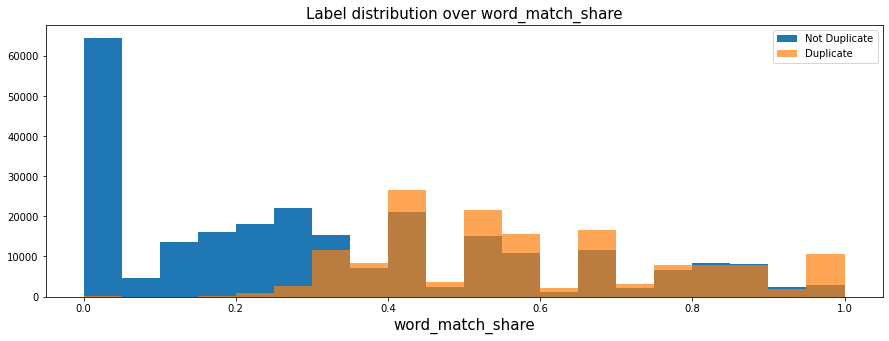

In [ ]:
# initial feature analysis
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row[3]).lower().split():
      if word not in stops:
        q1words[word] = 1
    for word in str(row[4]).lower().split():
      if word not in stops:
        q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
print(train_word_match.head())
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

# TF-IDF

In [ ]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [ ]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し?', 9.998000399920016e-05),
 ('19-year-old.', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('109?', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05),
 ('fulfill?', 9.998000399920016e-05)]

In [ ]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row[3]).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row[4]).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


0    0.772164
1    0.361758
2    0.355191
3    0.000000
4    0.000000
dtype: float64


Text(0.5, 0, 'word_match_share')

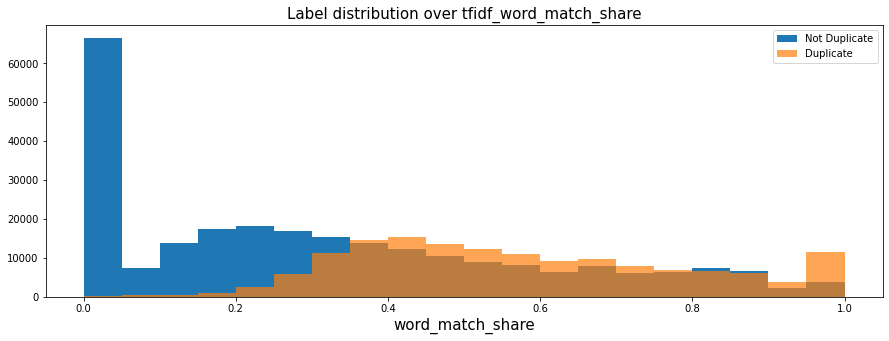

In [ ]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
print(tfidf_train_word_match.head())
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [ ]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match.fillna(0)))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.7804327049353577
   TFIDF AUC: 0.7704802292218704


# Rebalancing the Data

In [ ]:
def word_match_share_test(row):
    q1words = {}
    q2words = {}
    for word in str(row[1]).lower().split():
      if word not in stops:
        q1words[word] = 1
    for word in str(row[2]).lower().split():
      if word not in stops:
        q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

In [ ]:
def tfidf_word_match_share_test(row):
    q1words = {}
    q2words = {}
    for word in str(row[1]).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row[2]).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

In [ ]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share_test, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share_test, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.19124366100096607


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)
print(x_train[:10])

        word_match  tfidf_word_match
328775    0.181818          0.204887
262349    0.571429          0.401450
337320    0.285714          0.314876
21922     0.400000          0.453706
40069     0.571429          0.582840
231284    0.000000          0.000000
301297    0.750000          0.708825
76605     0.500000          0.503209
185561    0.545455          0.534809
120756    0.571429          0.447752


# XGBoost

In [ ]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
params['booster'] = 'gbtree'
params['learning_rate'] = 0.01

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.688149	valid-logloss:0.688174
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.643188	valid-logloss:0.64345
[20]	train-logloss:0.605846	valid-logloss:0.606316
[30]	train-logloss:0.574467	valid-logloss:0.575119
[40]	train-logloss:0.547858	valid-logloss:0.548664
[50]	train-logloss:0.525114	valid-logloss:0.526049
[60]	train-logloss:0.505551	valid-logloss:0.506603
[70]	train-logloss:0.488639	valid-logloss:0.489795
[80]	train-logloss:0.473954	valid-logloss:0.475203
[90]	train-logloss:0.461159	valid-logloss:0.462491
[100]	train-logloss:0.44997	valid-logloss:0.451379
[110]	train-logloss:0.440161	valid-logloss:0.44164
[120]	train-logloss:0.431541	valid-logloss:0.433085
[130]	train-logloss:0.423949	valid-logloss:0.425549
[140]	train-logloss:0.417233	valid-logloss:0.418887
[150]	train-logloss:0.411284	valid-logloss:0.412991
[160]	train-logloss:0.406029	va

In [ ]:
d_test = xgb.DMatrix(x_test)
print(len(x_test))
p_test = bst.predict(d_test)
p_test = [0 if item <0.5 else 1 for item in p_test]
sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)

2345796


In [ ]:
result_file = pd.read_csv("simple_xgb.csv")
result_file.head()

,test_id,is_duplicate
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
bst.plot_importance(bst,height=0.8,title='影响糖尿病的重要特征', ylabel='特征')

AttributeError: ignored

# SVM

In [ ]:
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
import torchtext.vocab

# Traning Preparation and Load Word Vector

In [ ]:
# 停用词表
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
print("stop words:", list(stop_words))

punctuations = [',', '.', '!', '?', '…', '@', '%', '&', '*', '/']

# 加载词向量
glove = torchtext.vocab.GloVe(name='6B', dim=50)
print(f'there are {len(glove.itos)} in the vocabulary')



In [ ]:
# test one word
print(f'the vector of "the" is {glove.vectors[glove.stoi["the"]]}')
print(f'dimension of vector is {len(glove.vectors[glove.stoi["the"]])}')

# clean data

In [ ]:
string_array = ['a', 'car']
string = ''
print(' '.join(string_array).lstrip())

str_e = 'hello!'
if "!" in str_e:
  print("execute")
  str_e = str_e.replace("!", "")
print(str_e)


def remove_stopwords_train_q1(row):
  punctuations = [',', '.', '!', '?', '…', '@', '%', '&', '*', '/', '(', ')']
  q1_result = []
  q1_words = str(row[3]).lower().split()
  for word in q1_words:
    for p_item in punctuations:
      if p_item in word:
        word = word.replace(p_item, '')
    if word not in stop_words:
      q1_result.append(word)
  return ' '.join(q1_result).lstrip()

def remove_stopwords_train_q2(row):
  punctuations = [',', '.', '!', '?', '…', '@', '%', '&', '*', '/', '(', ')']
  q2_result = []
  q2_words = str(row[4]).lower().split()
  for word in q2_words:
    for p_item in punctuations:
      if p_item in word:
        word = word.replace(p_item, '')
    if word not in stop_words:
      q2_result.append(word)
  return ' '.join(q2_result).lstrip()

def remove_stopwords_test_q1(row):
  punctuations = [',', '.', '!', '?', '…', '@', '%', '&', '*', '/', '(', ')']
  q1_result = []
  q1_words = str(row[1]).lower().split()
  for word in q1_words:
    for p_item in punctuations:
      if p_item in word:
        word = word.replace(p_item, '')
    if word not in stop_words:
      q1_result.append(word)
  return ' '.join(q1_result).lstrip()

def remove_stopwords_test_q2(row):
  punctuations = [',', '.', '!', '?', '…', '@', '%', '&', '*', '/', '(', ')']
  q2_result = []
  q2_words = str(row[2]).lower().split()
  for word in q2_words:
    for p_item in punctuations:
      if p_item in word:
        word = word.replace(p_item, '')
    if word not in stop_words:
      q2_result.append(word)
  return ' '.join(q2_result).lstrip()

In [ ]:
df_train_clean = pd.DataFrame()
df_train_clean['q1'] = df_train.apply(remove_stopwords_train_q1, axis=1, raw=True)
df_train_clean['q2'] = df_train.apply(remove_stopwords_train_q2, axis=1, raw=True)
df_train_clean['is_duplicate'] = df_train['is_duplicate']
df_train_clean = df_train_clean.fillna(method='ffill')
print(df_train_clean.head())


df_test_clean = pd.DataFrame()
df_test_clean['q1'] = df_test.apply(remove_stopwords_test_q1, axis=1, raw=True)
df_test_clean['q2'] = df_test.apply(remove_stopwords_test_q2, axis=1, raw=True)
df_test_clean = df_test_clean.fillna(method='ffill')
print(df_test_clean.head())

# text to vector

In [ ]:
print('the' in glove.itos)

In [ ]:
def sentence_vector1(row):
  vector_result = torch.zeros(50)
  words_array = row[1].split(' ')
  for word in words_array:
    try:
      if word in glove.itos:
        vector_result += glove.vectors[glove.stoi[word]]
    except:
      continue

    
  vector_result /= len(words_array)

  return vector_result


def sentence_vector2(row):
  vector_result = torch.zeros(50)
  words_array = row[2].split(' ')
  for word in words_array:
    try:
      if word in glove.itos:
        vector_result += glove.vectors[glove.stoi[word]]
    except:
      continue
    

  vector_result /= len(words_array)

  return vector_result


In [ ]:
df_vector = df_train_clean.apply(sentence_vector1, axis=1, raw=True)
df_vector = np.asarray(df_vector)
print(df_vector.shape)

# SVM

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


accuracy rbf: 0.7099770656895027
accuracy linear: 0.7322130969006649
accuracy sigmoid: 0.5018514010429346
training_acc 0.7326438048136735


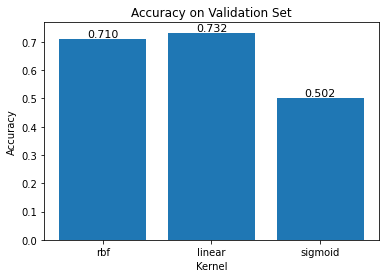

In [ ]:
# SVM
from sklearn.svm import SVC
import matplotlib.pyplot as plt

x_test = x_test.fillna(method='ffill')
x_train= x_train.fillna(method='ffill')
x_valid = x_valid.fillna(method='ffill')

clf1 = SVC(kernel='rbf', max_iter=100)
clf1.fit(x_train,y_train)

clf2 = SVC(kernel='linear', max_iter=100)
clf2.fit(x_train,y_train)

clf3 = SVC(kernel='sigmoid', max_iter=100)
clf3.fit(x_train,y_train)

# validation
predicting_labels1 = clf1.predict(x_valid)
predicting_labels2 = clf2.predict(x_valid)
predicting_labels3 = clf3.predict(x_valid)

accuracy1 = (predicting_labels1 == y_valid).sum() / len(y_valid)
accuracy2 = (predicting_labels2 == y_valid).sum() / len(y_valid)
accuracy3 = (predicting_labels3 == y_valid).sum() / len(y_valid)

print("accuracy rbf:", accuracy1)
print("accuracy linear:", accuracy2)
print("accuracy sigmoid:", accuracy3)

training_prediction = clf2.predict(x_train)
training_acc = (training_prediction == y_train).sum() / len(y_train)
print("training_acc", training_acc)



fig = plt.bar(x=['rbf', 'linear', 'sigmoid'], height=[accuracy1, accuracy2, accuracy3])
plt.title("Accuracy on Validation Set")
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
for a, b in zip(['rbf', 'linear', 'sigmoid'], [accuracy1, accuracy2, accuracy3]):
 plt.text(a, b, '%.3f'%b, ha='center', va='bottom', fontsize=11)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random 

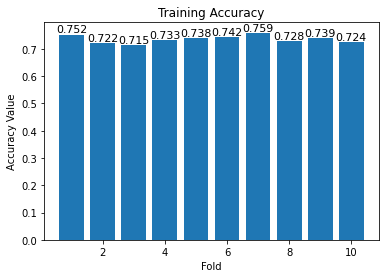

0.7352


In [ ]:
fig = plt.bar(x = [1,2,3,4,5,6,7,8,9,10], height = [0.752, 0.722, 0.715, 0.733, 0.738, 0.742, 0.759, 0.728, 0.739, 0.724])
plt.title("Training Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy Value")
for a, b in zip([1,2,3,4,5,6,7,8,9,10], [0.752, 0.722, 0.715, 0.733, 0.738, 0.742, 0.759, 0.728, 0.739, 0.724]):
 plt.text(a, b, '%.3f'%b, ha='center', va='bottom', fontsize=11)
plt.show()

mean_value = np.mean([0.752, 0.722, 0.715, 0.733, 0.738, 0.742, 0.759, 0.728, 0.739, 0.724])
print(mean_value)